### Machine Learning, Ex1
The file `ex1data1.txt` contains the dataset for linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city.

In [1]:
# Loading Modules
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

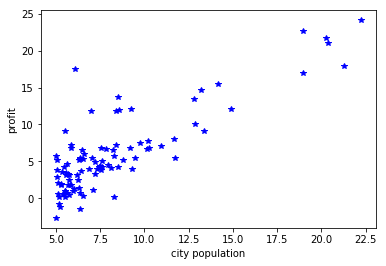

In [2]:
data = np.loadtxt('ex1data1.txt', dtype=float, delimiter=',')
X = data[:,0]
y = data[:,1]
pl.plot(X, y, '*b', linewidth=3)
pl.xlabel('city population')
pl.ylabel('profit')
pl.show()

Function to calculate the cost function for a linear regression algorithm. It is defined 
$$ J(\theta) = \frac{1}{2m}\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) $$
where $m$ is the number of training samples.

In [3]:
def J_cost(X,Y, theta):
    """ compute the cost function for given 
    features X and goals Y, theta is the fitting paramater
    """
    m = Y.shape[0]              # number of training data
    
    aux1 = np.dot(X,theta)
    aux2 = (Y-aux1)*(Y-aux1)
    J = (1./(2.*m)) * np.sum(aux2)
    
    return J

To learn the linear regression paramter $\theta$, we implement **gradient descent** algorithm to minimize the cost function $J(\theta)$. In each iteration, the new value of hypothesis parameter would be
$$ \theta_j^{n+1} = \theta_j^{n} - \alpha\frac{\partial J}{\partial \theta_j} $$

In [4]:
def g_desc(X,Y, theta, alpha, num_iters):
    """ This function uses gradient descent to fit the 
    hypothesis parameters
    """
    m = Y.shape[0]
    # value of cost function is saved for plotting
    J_arr = np.zeros((num_iters), float)
    theta_arr = np.zeros((num_iters,2), float)
    
    for it in range(num_iters):
        error = np.dot(X,theta) - Y
        aux0 = theta[0] - (alpha/m) * np.sum(error*X[:,0])
        aux1 = theta[1] - (alpha/m) * np.sum(error*X[:,1])
        # update theta
        theta = np.array([aux0, aux1], float)

        # save data for plotting
        theta_arr[it] = theta
        J_arr[it] = J_cost(X,Y,theta)

    return theta, J_arr, theta_arr


Applying the linear regression algorithm to the truck problem

In [5]:
# number of training samples
m = X.shape[0]
# add intercept column
X =np.c_[np.ones(m),data[:,0]]
# hypothesis parameters
theta = np.zeros(2)
# number of iteration
num_iters = 1500
# fitting rate
alpha = 0.01
# save cost function for each iteration
J_arr = np.zeros((num_iters), float)
theta_arr = np.zeros((num_iters,2), float)

print("Cost: ", J_cost(X, y, theta))
theta, J_arr, theta_arr = g_desc(X, y, theta, alpha, num_iters)

print("theta = ", theta)
print("Cost: ", J_cost(X, y, theta))
print(np.mean(np.abs(X.dot(theta) - y)))

Cost:  32.0727338775
theta =  [-3.63029144  1.16636235]
Cost:  4.48338825659
2.21079579118


First we need to divide the data set to training and cross-validation set to measure how good perform our model.  

2.17200858685
2.24009298382


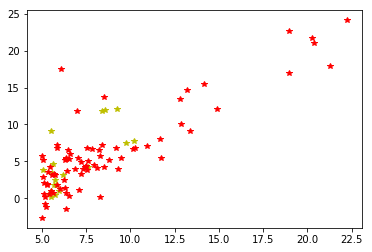

In [6]:
m = X.shape[0]
indx_cross = np.random.choice(m,int(.2*m), replace=False)
Xcross = X[indx_cross]
ycross = y[indx_cross]
pl.plot(Xcross[:,1], ycross, 'y*')

Xtrain = np.delete(X, indx_cross, axis=0)
ytrain = np.delete(y, indx_cross, axis=0)
pl.plot(Xtrain[:,1], ytrain, 'r*')

theta = np.zeros(2)
theta, J_arr, theta_arr = g_desc(Xtrain, ytrain, theta, alpha, num_iters)
print(np.mean(np.abs(Xtrain.dot(theta) - ytrain)))
print(np.mean(np.abs(Xcross.dot(theta) - ycross)))

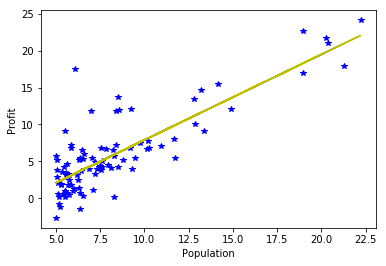

In [7]:
rand_indx = np.random.randint
pl.plot(X[:,1], y[:], 'b*')
pl.plot(X[:,1], theta[0] + theta[1]*X[:,1], 'y-')
pl.xlabel('Population')
pl.ylabel('Profit')

pl.show()

#### Using `scikit-learn` library

In [8]:
import sklearn as sk
import sklearn.linear_model as skl

In [9]:
model_l = skl.LinearRegression()

-4.73239759581 1.28752875877
2.48496974798


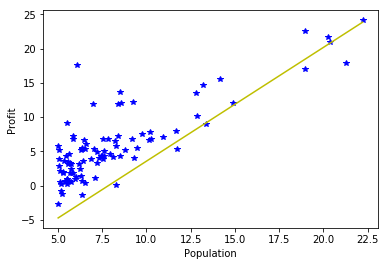

In [19]:
# no intercept is needed for scikit-learn implementation
X = data[:,0].reshape(-1,1)
y = data[:,1]

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split( X, y, 
                                                                       test_size=0.2, random_state=42)
model_fit = model_l.fit(X_train,y_train)
theta0 = model_fit.intercept_
theta1 = model_fit.coef_[0]
print(theta0, theta1)
pl.plot(X[:,0], y[:], 'b*')
pl.plot([min(X), max(X)], [theta0, theta0 + theta1*max(X)], 'y-')
pl.xlabel('Population')
pl.ylabel('Profit')

error = np.mean(np.abs(model_fit.predict(X_test) - y_test))
print(error)
pl.show()